In [1]:
import sys 
import os

# Add the parent directory to the path if it's not already there
if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))

In [2]:
%load_ext autoreload
%autoreload 2

In [80]:
from src import DDQL, MarketEnvironnement, ExperienceReplay
import matplotlib.pyplot as plt

In [91]:
env = MarketEnvironnement(initial_inventory=500, multi_episodes=True)

In [92]:
agent = DDQL(state_size=env.state_size, initial_budget=env.initial_inventory, horizon=env.horizon)

Using cpu device


In [93]:
env.reset()

In [94]:
exp_replay = ExperienceReplay(state_size=env.state_size, capacity=1000)

In [95]:
for _ in range(100):
    env.reset()
    while not env.done:
        current_state = env.state.copy()
        action = agent(current_state)
        reward = env.step(action)

        distance2horizon = env.horizon - env.state["period"]
        exp_replay.push(current_state, action, reward, env.state.copy(), distance2horizon if distance2horizon <=1 else 2)

    


array([ExperienceDict({'state': {'Price': 100.0, 'period': 0.0, 'inventory': 500}, 'action': 312, 'reward': -23.226960513868825, 'next_state': {'Price': 99.97919995898276, 'period': 1.0, 'inventory': 188}, 'done': 2}),
       ExperienceDict({'state': {'Price': 99.97919995898276, 'period': 1.0, 'inventory': 188}, 'action': 30, 'reward': 6.2329980625653105, 'next_state': {'Price': 100.02565870640524, 'period': 2.0, 'inventory': 158}, 'done': 2}),
       ExperienceDict({'state': {'Price': 100.02565870640524, 'period': 2.0, 'inventory': 158}, 'action': 30, 'reward': 2.6753447151070864, 'next_state': {'Price': 100.03812071362188, 'period': 3.0, 'inventory': 128}, 'done': 2}),
       ExperienceDict({'state': {'Price': 100.03812071362188, 'period': 3.0, 'inventory': 128}, 'action': 1, 'reward': -4.004965702136202, 'next_state': {'Price': 100.0218991571232, 'period': 4.0, 'inventory': 127}, 'done': 2}),
       ExperienceDict({'state': {'Price': 100.0218991571232, 'period': 4.0, 'inventory': 12

In [73]:
agent.learn(exp_replay.memory)

3


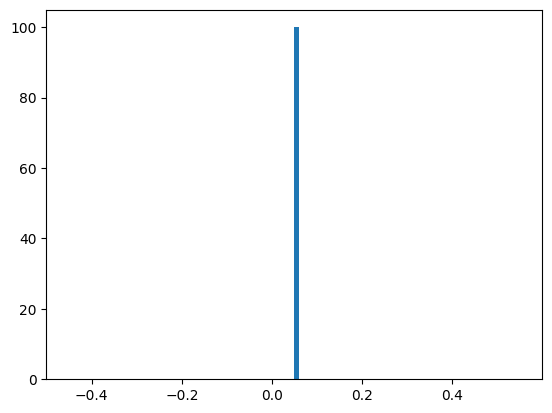

NameError: name 'np' is not defined

In [11]:
#distribution of rewards
plt.hist(rewards, bins=100, density=True)
plt.show()

print(f"mean reward: {np.mean(rewards)}")
print(f"std reward: {np.std(rewards)}")

In [106]:

# Draft Martial

import pandas as pd
import numpy as np

def fake_data(S : float = 100, r : float = 0.1, sigma : float = 0.2):
    # Creation of the dataset output
    data = pd.DataFrame(pd.date_range(start='2022-01-01 11:00:01', end='2022-01-01 13:00:00', freq = "s"), columns=['Date'])
    num_points, _ = np.shape(data)

    # Simulate a Black-Scholes trajectory
    dt = 1/252/6.5/3600 # scale of a second
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=num_points - 1)
    log_returns = np.concatenate([[0], drift + diffusion])
    log_prices = np.cumsum(log_returns)
    prices = S * np.exp(log_prices)
    
    data["Price"] = prices
    data.set_index('Date', inplace=True)


    return data


In [107]:
a, b, c = fake_data(), fake_data(), fake_data()

In [108]:
c.to_csv('../data/historical_data_1.csv')

In [71]:
print(next(enumerate(np.split(a, 10))))

(0,                           Price
Date                           
2022-01-01 11:00:01  100.000000
2022-01-01 11:00:02   99.997536
2022-01-01 11:00:03  100.004751
2022-01-01 11:00:04  100.019533
2022-01-01 11:00:05  100.018362
...                         ...
2022-01-01 11:11:56  100.101370
2022-01-01 11:11:57  100.101435
2022-01-01 11:11:58  100.100410
2022-01-01 11:11:59  100.104073
2022-01-01 11:12:00  100.111706

[720 rows x 1 columns])


In [42]:
a.values

array([[100.        ],
       [100.00866308],
       [100.01940408],
       ...,
       [ 99.23107155],
       [ 99.2341913 ],
       [ 99.22637508]])